<a href="https://colab.research.google.com/github/Rodrigoveloso7/dimensionamento-desumidificador/blob/main/Dimensionamento_Desumidificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação bibliotecas

In [3338]:
# pip install CoolProp


In [3339]:
# pip install ht

In [3340]:
import numpy as np
from CoolProp.CoolProp import PropsSI
import ht as ht
import ht.boiling_flow as bf

#Condições de operação Biogás

In [3341]:
# fracoes_volumetricas = {"Methane":0.60,"CarbonDioxide":0.35,"Water":0.05} # Frações volumétricas dos componentes do biogás
fracoes_volumetricas = {"Nitrogen":0.7691,"Oxygen":0.2078,'Argon':0.0092,'CarbonDioxide':0.0004,'Water':0.017} # Frações volumétricas dos componentes do biogás
# fracoes_volumetricas = {"Methane":0.637,"CarbonDioxide":0.35,"Water":0.013}

In [3342]:
P_entrada_biogas = 33.34*1000 # [Pa] - Pressão de admissão do biogás
T_entrada_biogas = 273.15+ 74.8# [K] - Temperatura de admissão do biogás
T_referencia = 273.15 # [K] - Temperatura de referência
P_referencia = 101325 # [Pa] - Pressão de referência
vazao_normal_biogas = 60 # [Nm³/h] - Vazão volumétrica normalizada do biogás
T_alvo_biogas = 273.15 + 24.6 # [K] - Temperatura pretendida do biogás na saída
T_alvo_arrefecimento = 273.15-1 # [K] - Temperatura pretendida do líquido de arrefecimento
T_ambiente = 273.15+20 # [K] - Temperatura Ambiente
P_ambiente = 101325 # [Pa] - Pressão ambiente

In [3343]:
z = (sum(PropsSI('Z', 'T', T_entrada_biogas, 'P', P_entrada_biogas, elemento)*fracoes_volumetricas[elemento]for elemento in fracoes_volumetricas))
z

1.0033896427995057

# Propriedades geométricas serpentina

In [3344]:
diam_hel_serp = 270/1000 # m Diâmetro da espira
dext_serp = 12.7/1000 # m Diâmetro externo da serpentina
espessura_serp = 1.2/1000 # m Espessura da serpentina
diam_interno_serp = dext_serp-2*espessura_serp # m Diâmetro interno da serpentina

#Propriedades geométricas colméia

In [3345]:
dext_tubos = 19.05/1000 # m
espessura_tubos = 1.2/1000 # m
dint_tubos = dext_tubos-2*espessura_tubos # m
A_int_tubos = np.pi*(dint_tubos**2)/4 # m²
# A_ext_tubos = np.pi*(dext_tubos**2)/4 # m²
N = 66

#Propriedades geométricas casco

In [3346]:
diam_casco = 330/1000 # m Diâmetro interno do casco
diam_entrada_arrefecimento = 19.05/1000 # m Diâmetro de entrada do fluido de arrefecimento
comprimento_casco = 1995/1000 # m Comprimento do casco
volume_arrefecimento = ((np.pi*((diam_casco)**2))/4)-((np.pi*(dext_serp**2)/4)*N)*comprimento_casco # m³ Volume do fluido de arrefecimento (mistura água + monoetilenoglicol)
volume_arrefecimento = 135/1000 # Preciso entender melhor como compor este volme, só volume_arrefecimento não atende, tenho que adicionar volume dos tubos externos.




#Condições de operação líquido de arrefecimento

https://www.engineeringtoolbox.com/ethylene-glycol-d_146.html

Considerando uma mistura 80% água e 20% monoetilenoglicol para obter uma temperatura de solidificação de -7.9C

In [3347]:
cp_arrefecimento = 3.951*1000 # J/kg.K
densidade_arrefecimento = 1030 # kg/m³
viscosidade_dinamica_arrefecimento = 1.42/1000 # Pa.s Este valor foi obtido em cima de fracao massica
k_arrefecimento = 0.55 # W/mK
massa_arrefecimento = volume_arrefecimento*densidade_arrefecimento #kg
massa_arrefecimento
tempo_arrefecimento = 60*40 # segundos

In [3348]:
vazao_volumetrica_bomba = 1.8/3600 #m³/s
vazao_massica_bomba = vazao_volumetrica_bomba*densidade_arrefecimento
D_livre = diam_casco-diam_hel_serp
D_livre


0.06

In [3349]:
vazao_volumetrica_bomba = 1.8/3600 #m³/s
vazao_massica_bomba = vazao_volumetrica_bomba*densidade_arrefecimento
A_casco = (np.pi*(diam_casco**2)/4)
A_serp = ((np.pi*(diam_hel_serp**2)/4)-(np.pi*((diam_hel_serp-2*dext_serp)**2)/4))
A_tubos = (np.pi*(dext_tubos**2)/4)*N
Ac = A_casco - A_serp - A_tubos
# Ac = A_casco - (np.pi*(diam_hel_serp**2)/4)
# u_casco = vazao_massica_bomba/(densidade_arrefecimento*Ac)
# u_casco
# Ac = (np.pi*(diam_casco**2)/4)- ((np.pi*(diam_hel_serp**2)/4))
# D_livre = diam_casco-diam_hel_serp
# print(Ac)
# # u_casco = vazao_massica_bomba/(densidade_arrefecimento*Ac)
Ac = (np.pi*(diam_casco**2)/4)
u_casco = (vazao_volumetrica_bomba/(Ac))*0.21
print(u_casco)
# ar = (np.pi*(diam_entrada_arrefecimento**2))/4
# print(Ac)
# print(u_casco)



0.0012276414343176498


In [3350]:
# vazao_volumetrica_bomba = 1.8/3600 #m³/s
# vazao_massica_bomba = vazao_volumetrica_bomba*densidade_arrefecimento
# D_livre = 67.5/1000
# Ac = (np.pi*(D_livre**2)/4)
# print(Ac)
# u_casco = vazao_massica_bomba/(densidade_arrefecimento*Ac)
# # u_casco = vazao_volumetrica_bomba/((np.pi*((diam_entrada_arrefecimento))**(2))/4)
# u_casco

In [3351]:
vazao_volumetrica_biogas_entrada = (vazao_normal_biogas*(P_referencia/P_entrada_biogas)*(T_entrada_biogas/T_referencia))/3600 #m³/s
massa_molar_total_entrada = 0
for elementos in fracoes_volumetricas:
    massa_molar_total_entrada = massa_molar_total_entrada + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_entrada_biogas, 'P', P_entrada_biogas, elementos)
densidade_operacao_biogas = (P_entrada_biogas*massa_molar_total_entrada)/(8.314*T_entrada_biogas)
vazao_massica_biogas = vazao_volumetrica_biogas_entrada*densidade_operacao_biogas


In [3352]:
densidade_operacao_biogas

0.33290834811067527

In [3353]:
massa_molar_total = 0
cp_biogas = 0
for elementos in fracoes_volumetricas:
  massa_molar_total = massa_molar_total + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_entrada_biogas, 'P', P_entrada_biogas, elementos)
massa_molar_total

0.028885903184

#Função para definição de calor específico do biogás em função da pressão e temperatura

In [3354]:
def cp_biogas(P_biogas,T_biogas):
   massa_molar_total = 0
   cp_biogas = 0
   for elementos in fracoes_volumetricas:
    massa_molar_total = massa_molar_total + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_biogas, 'P', P_biogas, elementos)
   #print(massa_molar_total)
   for elementos in fracoes_volumetricas:
    cp_biogas = cp_biogas + (((PropsSI('M', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos)*fracoes_volumetricas[elementos])/massa_molar_total)*PropsSI('C', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos))
   return cp_biogas

#Definição da temperatura de orvalho

In [3355]:
# P_vapor_agua = P_entrada_biogas*fracoes_volumetricas['Water']
# T_orvalho = PropsSI('T', 'P', P_vapor_agua, 'Q', 0, 'Water')
# T_orvalho

#Função para determinação de carga termica

In [3356]:
def carga_termica():
  divisoes = 500
  Qsens_biogas = 0
  T = np.linspace(T_entrada_biogas,T_alvo_biogas,divisoes)
  for i in range(len(T)-1):
    cp = cp_biogas(P_entrada_biogas,(T[i]+T[i+1])/2)
    Qsens_biogas = vazao_massica_biogas*cp*(T[i] - T[i+1]) + Qsens_biogas
    cp= 0
  Qlat_biogas = vazao_massica_biogas*(fracoes_volumetricas['Water']*PropsSI('M', 'T', T_entrada_biogas, 'P', P_entrada_biogas, elementos)/massa_molar_total_entrada)*(((PropsSI("H", "T", T_alvo_biogas, "Q", 1, "Water")) - PropsSI("H", "T", T_alvo_biogas,"Q", 0, "Water")))
  Q_arrefecimento = massa_arrefecimento*cp_arrefecimento*(T_ambiente - T_alvo_arrefecimento)/tempo_arrefecimento
  Qtotal = Qlat_biogas + Qsens_biogas +Q_arrefecimento
  return Qtotal,Qlat_biogas,Qsens_biogas,Q_arrefecimento

In [3357]:
carga_termica()

(np.float64(6458.503232465147),
 556.2889799379452,
 np.float64(1095.0819400272028),
 4807.1323125)

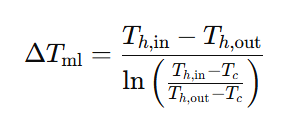

#Calculando comprimento evaporador

Definição da vazão mássica a partir da carga térmica, utilizando software CoolSelector da Danfoss


In [3358]:
vazao_massica_refri = 183.4/3600 #kg/s
T_evap = 269.9-21 # K
P_entrada_evap = 291.8*1000 #Pa
x_ini = 0.35 # fração de vapor na entrada do evaporador
Q_lat_refr = vazao_massica_refri*(((PropsSI("H", "T", T_evap, "Q", 1, "R22")) - PropsSI("H", "T", T_evap, "Q", 0.3, "R22")))
Q_lat_refr # W

7950.773967326643

In [3359]:
T_sat = T_evap
fluid = 'R22'
divisoes = 200
superaquecimento = 8
T_range_superaquecimento = np.linspace(T_sat,T_sat+ superaquecimento,divisoes)
k_inox = 16
Re_casco = (densidade_arrefecimento*u_casco*D_livre)/(viscosidade_dinamica_arrefecimento)
Pr_casco = (cp_arrefecimento*viscosidade_dinamica_arrefecimento)/(k_arrefecimento)
Re_casco
k_inox = 16
Re_ext_serp = (densidade_arrefecimento*u_casco*dext_serp)/(viscosidade_dinamica_arrefecimento)
Pr_ext_serp = (cp_arrefecimento*viscosidade_dinamica_arrefecimento)/(k_arrefecimento)
Re_ext_tubos = (densidade_arrefecimento*u_casco*dext_tubos)/(viscosidade_dinamica_arrefecimento)
Pr_ext_tubos = (cp_arrefecimento*viscosidade_dinamica_arrefecimento)/(k_arrefecimento)

https://www.sciencedirect.com/science/article/abs/pii/S0140700714002369

https://jingweizhu.weebly.com/uploads/1/3/5/4/13548262/summary_of_chen%E2%80%99s_correlation_for_boiling_heat_transfer_to_saturated_fluids_in_convective_flow.pdf

Esse e descrição do chat gpt


In [3360]:
# Propriedades obtidas na linha de saturação
rhol = PropsSI('D', 'T', T_evap, 'Q', 0, fluid)       # kg/m³
rhog = PropsSI('D', 'T', T_evap, 'Q', 1, fluid)       # kg/m³
mul  = PropsSI('V', 'T', T_evap, 'Q', 0, fluid)       # Pa.s
mug  = PropsSI('V', 'T', T_evap, 'Q', 1, fluid)       # Pa.s
kl   = PropsSI('L', 'T', T_evap, 'Q', 0, fluid)       # W/m.K
Cpl  = PropsSI('C', 'T', T_evap, 'Q', 0, fluid)       # J/kg.K
Hvap = PropsSI('H', 'T', T_evap, 'Q', 1, fluid) - \
      PropsSI('H', 'T', T_evap, 'Q', 0, fluid)       # J/kg
sigma = PropsSI('SURFACE_TENSION', 'T', T_evap, 'Q', 0, fluid)  # N/m


x = np.linspace(x_ini,0.99, divisoes)
x

array([0.35      , 0.35321608, 0.35643216, 0.35964824, 0.36286432,
       0.3660804 , 0.36929648, 0.37251256, 0.37572864, 0.37894472,
       0.3821608 , 0.38537688, 0.38859296, 0.39180905, 0.39502513,
       0.39824121, 0.40145729, 0.40467337, 0.40788945, 0.41110553,
       0.41432161, 0.41753769, 0.42075377, 0.42396985, 0.42718593,
       0.43040201, 0.43361809, 0.43683417, 0.44005025, 0.44326633,
       0.44648241, 0.44969849, 0.45291457, 0.45613065, 0.45934673,
       0.46256281, 0.46577889, 0.46899497, 0.47221106, 0.47542714,
       0.47864322, 0.4818593 , 0.48507538, 0.48829146, 0.49150754,
       0.49472362, 0.4979397 , 0.50115578, 0.50437186, 0.50758794,
       0.51080402, 0.5140201 , 0.51723618, 0.52045226, 0.52366834,
       0.52688442, 0.5301005 , 0.53331658, 0.53653266, 0.53974874,
       0.54296482, 0.5461809 , 0.54939698, 0.55261307, 0.55582915,
       0.55904523, 0.56226131, 0.56547739, 0.56869347, 0.57190955,
       0.57512563, 0.57834171, 0.58155779, 0.58477387, 0.58798

CORRELAÇÃO CHEN

In [3361]:
def correlacao_chen(x,fluid):
  # Fluido e condições de operação
  fluid = fluid
  T_sat = T_evap  # Temperatura de saturação em K (100 °C)
  Te = 8        # Superaquecimento da parede (T_wall - T_sat) em K         # Título de vapor
  # Derivada da pressão de saturação em função da temperatura (dPsat/dT)
  delta_T = 0.01  # K
  p1 = PropsSI('P', 'T', T_sat - delta_T, 'Q', 0, fluid)
  p2 = PropsSI('P', 'T', T_sat + delta_T, 'Q', 0, fluid)
  dPsat = (p2 - p1) / (2 * delta_T)  # Pa/K

  # Cálculo do coeficiente de convecção
  h = (bf.Chen_Bennett(vazao_massica_refri, x, diam_interno_serp, rhol, rhog, mul, mug, kl, Cpl, Hvap, sigma, dPsat, Te))
  return h


CORRELAÇÃO CHURCHILL BERNSTEIN

In [3362]:
def correlacao_churchill_bernstein(Re, Pr):
  nu_ext = ht.conv_external.Nu_cylinder_Churchill_Bernstein(Re, Pr)
  h_externo = ((nu_ext*k_arrefecimento/(dext_serp)))
  # h_externo = (nu_ext*k_arrefecimento/(diam_hel_serp))
  return h_externo

In [3363]:
def correlacao_dittus_boelter(Re, Pr,k):

  Nu = ht.conv_internal.turbulent_Dittus_Boelter(Re, Pr, heating=False, revised=True)
  h = ((Nu*k/diam_interno_serp))
  return h


In [3364]:
L_evap_vapor = 0
for i in range(len(T_range_superaquecimento)-1):
  Q_sup = vazao_massica_refri*PropsSI('C', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22')*(T_range_superaquecimento[i+1]-T_range_superaquecimento[i])
  velocidade_refrigerante_vapor = vazao_massica_refri/((np.pi*(diam_interno_serp**2)/4)*(PropsSI('D', 'T', T_range_superaquecimento[i]+T_range_superaquecimento[i+1]/2, 'P', P_entrada_evap, 'R22')))
  reynolds_vapor_refr = (velocidade_refrigerante_vapor*diam_interno_serp*PropsSI('D', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22'))/(PropsSI('V', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22'))
  # print(reynolds_vapor_refr)
  Pr_vapor = (PropsSI('C', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22')*PropsSI('V', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22'))/ (PropsSI('L', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22'))
  dtml = abs((T_range_superaquecimento[i+1]-T_range_superaquecimento[i])/(np.log(abs((T_alvo_arrefecimento-T_range_superaquecimento[i]))/abs((T_alvo_arrefecimento-T_range_superaquecimento[i+1])))))
  L_evap_vapor_temp = Q_sup*(((np.log(dext_serp/diam_interno_serp))/(2*np.pi*k_inox))+(1/correlacao_dittus_boelter(reynolds_vapor_refr, Pr_vapor,PropsSI('L', 'T', (T_range_superaquecimento[i]+T_range_superaquecimento[i+1])/2, 'P', P_entrada_evap, 'R22'))*np.pi*diam_interno_serp))+(1/(correlacao_churchill_bernstein(Re_ext_serp, Pr_ext_serp)*np.pi*dext_serp))*(1/(dtml))
  L_evap_vapor = L_evap_vapor + L_evap_vapor_temp
print(Re_ext_serp)
L_evap_vapor

11.308998311485336


np.float64(2.2430803580905474)

In [3365]:
L_evap = 0
for i in range(len(x)-1):
  Q_lat_refr = vazao_massica_refri*(((PropsSI("H", "T", T_evap, "Q", x[i+1], "R22")) - PropsSI("H", "T", T_evap, "Q", x[i], "R22")))
  L_evap_temp = Q_lat_refr*(((np.log(dext_serp/diam_interno_serp))/(2*np.pi*k_inox))+(1/(correlacao_chen(x[i],'R22')*np.pi*diam_interno_serp))+(1/(correlacao_churchill_bernstein(Re_ext_serp, Pr_ext_serp)*np.pi*dext_serp)))*(1/(T_alvo_arrefecimento-T_evap))
  L_evap = L_evap + L_evap_temp
L_evap

np.float64(39.96473116091078)

In [3366]:
L_serpentina = L_evap+L_evap_vapor
L_serpentina

np.float64(42.207811519001325)

Cálculo região de superaquecimento

#Dimensionamento tubos colméia

#Função para definição da viscosidade dinâmica do biogás em função da temperatura e pressão

In [3367]:
def visc_dinamica_biogas(P_biogas,T_biogas):
   massa_molar_total = 0
   visc_dinamica_biogas = 0
   for elementos in fracoes_volumetricas:
    massa_molar_total = massa_molar_total + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_biogas, 'P', P_biogas, elementos)
   #print(massa_molar_total)
   for elementos in fracoes_volumetricas:
    visc_dinamica_biogas = visc_dinamica_biogas + (((PropsSI('M', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos)*fracoes_volumetricas[elementos])/massa_molar_total)*PropsSI('V', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos))
   return visc_dinamica_biogas

#Função para definição da condutividade térmica do biogás em função da temperatura e pressão

In [3368]:
def condutividade_biogas(P_biogas,T_biogas):
   massa_molar_total = 0
   condutividade_biogas = 0
   for elementos in fracoes_volumetricas:
    massa_molar_total = massa_molar_total + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_biogas, 'P', P_biogas, elementos)
   #print(massa_molar_total)
   for elementos in fracoes_volumetricas:
    condutividade_biogas = condutividade_biogas + (((PropsSI('M', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos)*fracoes_volumetricas[elementos])/massa_molar_total)*PropsSI('L', 'T', T_biogas, 'P', P_biogas*fracoes_volumetricas[elementos], elementos))
   return condutividade_biogas

#Função para definição de densidade do biogás em função da temperatura e pressão

In [3369]:
def densidade_biogas(P_biogas,T_biogas):
   massa_molar_total = 0
   densidade_biogas = 0
   for elementos in fracoes_volumetricas:
    massa_molar_total = massa_molar_total + fracoes_volumetricas[elementos]*PropsSI('M', 'T', T_biogas, 'P', P_biogas, elementos)
   #print(massa_molar_total)
   densidade_biogas = (P_biogas*massa_molar_total)/(8.314*T_biogas)
   return densidade_biogas

In [3370]:
P_entrada_biogas
T_entrada_biogas

347.95

In [3371]:
# Rt_cond_tubos = np.log(dext_tubos/dint_tubos)/(2*np.pi*k_inox)
# vazao_massica_tubos = (vazao_massica_biogas/N)
# print(vazao_massica_biogas)
# print(vazao_massica_tubos)
# Q=0
# L_tubos_sen = 0
# divisoes = 100
# T = np.linspace(T_entrada_biogas,T_alvo_biogas,divisoes)
# print(P_entrada_biogas)
# for i in range(len(T)-1):
#   vel_tubos = (vazao_massica_tubos/(((densidade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)))*A_int_tubos))
#   # print(vel_tubos)
#   reynolds_biogas_sens = ((vel_tubos*dint_tubos*densidade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)))/(visc_dinamica_biogas(P_entrada_biogas,(T[i+1]+T[i])/2))
#   # print(reynolds_biogas_sens)
#   Pr_biogas_sens = (cp_biogas(P_entrada_biogas,(T[i+1]+T[i])/2) *visc_dinamica_biogas(P_entrada_biogas,(T[i+1]+T[i])/2) )/(condutividade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2))

#   nud_db_biogas_sens = 0.023*(reynolds_biogas_sens**(0.8))*(Pr_biogas_sens**(0.4))
#   nud_db_biogas_sens
#   h_conv_tubos_sens = (nud_db_biogas_sens*condutividade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)/(dint_tubos))*1.3
#   fator_atrito = (64/reynolds_biogas_sens)

#   # print(h_conv_tubos_sens)
#   # print(h_conv_tubos_sens)
#   Rt_conv_tubos = (1/(h_conv_tubos_sens*np.pi*dint_tubos))
#   Q_bio_sens = vazao_massica_tubos*cp_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)*(-T[i+1]+T[i])
#   L = Q_bio_sens*(Rt_cond_tubos+Rt_conv_tubos)/((((T[i+1]+T[i])/2)-T_alvo_arrefecimento))
#   Q = Q_bio_sens + Q
#   L_tubos_sen = L_tubos_sen + L
#   queda_pressao = fator_atrito*L*densidade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)*(vel_tubos**2)/(2*dint_tubos)
#   P_entrada_biogas = P_entrada_biogas - queda_pressao
#   # print(queda_pressao)
#   # print(Q
#   L =0
#   # print(Q)
# print(L_tubos_sen)
# print(P_entrada_biogas)
# print(Q)

CÁLCULO COMPRIMENTO COLMÉIA

In [3372]:
NT = 8
ST = 30/1000
SL = 30/1000

In [3373]:
def correlacao_zukauskas_bejan(Re, Pr, tube_rows, pitch_parallel, pitch_normal):
  Nu = ht.conv_tube_bank.Nu_Zukauskas_Bejan(Re, Pr, tube_rows, pitch_parallel, pitch_normal, Pr_wall=None)
  h = (Nu*k_arrefecimento/(dext_tubos))
  return h

In [3374]:
  # dtml_biogas = (T[i]-T[i+1])/(np.log((T[i]-T_alvo_arrefecimento)/(T[i+1]-T_alvo_arrefecimento)))

COMPRIMENTO SEM CONSIDERAR CONDENSAÇÃO DA ÁGUA

In [3375]:
Rt_cond_tubos = np.log(dext_tubos/dint_tubos)/(2*np.pi*k_inox)
vazao_massica_tubos = (vazao_massica_biogas/N)
print(vazao_massica_biogas)
print(vazao_massica_tubos)
Q=0
L_tubos_sen = 0
T = np.linspace(T_entrada_biogas,T_alvo_biogas,divisoes)
for i in range(len(T)-1):
  vel_tubos = (vazao_massica_tubos/(((densidade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)))*A_int_tubos))
  reynolds_biogas_sens = ((vel_tubos*dint_tubos*densidade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)))/(visc_dinamica_biogas(P_entrada_biogas,(T[i+1]+T[i])/2))
  Pr_biogas_sens = (cp_biogas(P_entrada_biogas,(T[i+1]+T[i])/2) *visc_dinamica_biogas(P_entrada_biogas,(T[i+1]+T[i])/2) )/(condutividade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2))
  print(reynolds_biogas_sens)
  # Rt_conv_int_tubos = 1/(correlacao_dittus_boelter(reynolds_biogas_sens,Pr_biogas_sens,condutividade_biogas(P_entrada_biogas,(T[i+1]+T[i])/2))*np.pi*dint_tubos)
  Rt_conv_int_tubos = 1/(3.66*np.pi*dint_tubos)
  Rt_conv_ext_tubos = (1/(correlacao_zukauskas_bejan(Re_casco,Pr_casco,NT,ST,SL)*np.pi*dext_tubos))
  Q_bio_sens = vazao_massica_tubos*cp_biogas(P_entrada_biogas,(T[i+1]+T[i])/2)*(-T[i+1]+T[i])
  L = Q_bio_sens*(Rt_conv_int_tubos+Rt_cond_tubos+Rt_conv_ext_tubos)/((((T[i+1]+T[i])/2)-T_alvo_arrefecimento))
  Q = Q_bio_sens + Q
  L_tubos_sen = L_tubos_sen + L
L_tubos_sen

0.021480287425302266
0.0003254589003833677
1200.8343429438014
1201.498239359753
1202.1630761965641
1202.8288555326922
1203.495579452757
1204.1632500475587
1204.831869414106
1205.501439655636
1206.1719628816377
1206.8434412078755
1207.5158767564144
1208.1892716556379
1208.8636280402784
1209.538948051436
1210.2152338366036
1210.8924875496914
1211.5707113510507
1212.2499074074956
1212.9300778923312
1213.6112249853745
1214.2933508729795
1214.9764577480626
1215.6605478101262
1216.3456232652848
1217.0316863262874
1217.7187392125445
1218.4067841501526
1219.095823371918
1219.7858591173838
1220.4768936328546
1221.1689291714217
1221.8619679929877
1222.5560123642967
1223.251064558953
1223.9471268574525
1224.6442015472069
1225.3422909225699
1226.0413972848633
1226.7415229424032
1227.4426702105284
1228.144841411623
1228.8480388751484
1229.5522649376655
1230.2575219428647
1230.963812241591
1231.6711381918728
1232.3795021589494
1233.0889065152949
1233.7993536406527
1234.5108459220542
1235.22338575385

np.float64(1.8951224760426981)

COMPRIMENTO PARA CONDENSAR VAPOR D'ÁGUA

In [3376]:
# Propriedades obtidas na linha de saturação
rhol_vp_agua = PropsSI('D', 'T', T_alvo_biogas, 'Q', 0, 'Water')       # kg/m³
rhog_vp_agua = PropsSI('D', 'T', T_alvo_biogas, 'Q', 1, 'Water')       # kg/m³
mul_vp_agua  = PropsSI('V', 'T', T_alvo_biogas, 'Q', 0, 'Water')       # Pa.s
mug_vp_agua  = PropsSI('V', 'T', T_alvo_biogas, 'Q', 1, 'Water')       # Pa.s
kl_vp_agua   = PropsSI('L', 'T', T_alvo_biogas, 'Q', 0, 'Water')       # W/m.K
Cpl_vp_agua  = PropsSI('C', 'T', T_alvo_biogas, 'Q', 0, 'Water')       # J/kg.K
Hvap_vp_agua = PropsSI('H', 'T', T_alvo_biogas, 'Q', 1, 'Water') - \
      PropsSI('H', 'T', T_alvo_biogas, 'Q', 0, 'Water')       # J/kg
sigma_vp_agua = PropsSI('SURFACE_TENSION', 'T', T_alvo_biogas, 'Q', 0, 'Water')  # N/m

In [3377]:
def correlacao_chen_vapor_agua(x,fluid):
  # Fluido e condições de operação
  fluid = fluid
  T_sat = T_alvo_biogas  # Temperatura de saturação em K (100 °C)
  Te = 8        # Superaquecimento da parede (T_wall - T_sat) em K         # Título de vapor
  # Derivada da pressão de saturação em função da temperatura (dPsat/dT)
  delta_T = 0.01  # K
  p1 = PropsSI('P', 'T', T_sat - delta_T, 'Q', 0, fluid)
  p2 = PropsSI('P', 'T', T_sat + delta_T, 'Q', 0, fluid)
  dPsat = (p2 - p1) / (2 * delta_T)  # Pa/K

  # Cálculo do coeficiente de convecção
  h = (bf.Chen_Bennett(vazao_massica_vapor_agua, x, dint_tubos, rhol_vp_agua, rhog_vp_agua, mul_vp_agua, mug_vp_agua, kl_vp_agua, Cpl_vp_agua, Hvap_vp_agua, sigma_vp_agua, dPsat, Te))
  return h

In [3378]:
L_tubo_condensacao = 0
Q_cond= 0
x_vapor_agua = np.linspace(0.01,0.99,divisoes)
vazao_massica_vapor_agua = (vazao_massica_biogas*((PropsSI('M', 'T', T_alvo_biogas, 'P', P_entrada_biogas*fracoes_volumetricas['Water'], 'Water')*fracoes_volumetricas['Water'])/massa_molar_total))/N
for i in range(len(x)-1):
  Q_lat_vapor_agua = vazao_massica_vapor_agua*(((PropsSI("H", "T", T_alvo_biogas, "Q", x_vapor_agua[i+1], "Water")) - PropsSI("H", "T", T_alvo_biogas, "Q", x_vapor_agua[i], "Water")))
  L_tubo_condensacao_temp = Q_lat_vapor_agua*(((np.log(dext_tubos/dint_tubos))/(2*np.pi*k_inox))+(1/(correlacao_chen_vapor_agua(x_vapor_agua[i],'Water')*np.pi*dint_tubos))+((1/(correlacao_zukauskas_bejan(Re_ext_tubos,Pr_ext_tubos,NT,ST,SL)*np.pi*dext_tubos))))*(1/(-T_alvo_arrefecimento+T_alvo_biogas))
  L_tubo_condensacao = L_tubo_condensacao + L_tubo_condensacao_temp
  Q_cond = Q_cond + Q_lat_vapor_agua
L_tubo_condensacao
print(L_tubo_condensacao)
print(Q_cond)

0.0572917090087992
8.260048489987652


In [3379]:
L_tubos = L_tubos_sen + L_tubo_condensacao
L_tubos

np.float64(1.9524141850514973)

In [3380]:
L_serpentina

np.float64(42.207811519001325)

In [3381]:
cp_aco = 486
rho_aco = 8000

In [3382]:
Q_aco = (((np.pi/4)*((dext_tubos**2)-(dint_tubos**2))*L*N*rho_aco)*cp_aco*(T_ambiente-T_alvo_arrefecimento))/tempo_arrefecimento
Q_aco

np.float64(2.5835854658251596)